In [5]:
# Importing analysis and visualization libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# Configure plots to render in notebook
%matplotlib inline
sns.set(style="whitegrid")


In [11]:
from google.colab import files
uploaded = files.upload()

Saving owid-covid-data.csv to owid-covid-data.csv


In [12]:
df = pd.read_csv('owid-covid-data.csv')

# Confirm load
print("✅ Dataset loaded with shape:", df.shape)

✅ Dataset loaded with shape: (429435, 67)


In [13]:
# Previewing the dataset structure
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN


In [14]:
# Dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429435 entries, 0 to 429434
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    429435 non-null  object 
 1   continent                                   402910 non-null  object 
 2   location                                    429435 non-null  object 
 3   date                                        429435 non-null  object 
 4   total_cases                                 411804 non-null  float64
 5   new_cases                                   410159 non-null  float64
 6   new_cases_smoothed                          408929 non-null  float64
 7   total_deaths                                411804 non-null  float64
 8   new_deaths                                  410608 non-null  float64
 9   new_deaths_smoothed                         409378 non-null  float64
 

In [15]:
# Check missing values in important columns
df[['location', 'date', 'total_cases', 'new_cases', 'total_deaths', 'new_deaths', 'people_vaccinated']].isnull().sum()

,0
location,0
date,0
total_cases,17631
new_cases,19276
total_deaths,17631
new_deaths,18827
people_vaccinated,348303


In [18]:
# Filter data for Kenya only
kenya_df = df[df['location'] == 'Kenya'].copy()

In [19]:
# Convert date column to datetime
kenya_df['date'] = pd.to_datetime(kenya_df['date'])

In [20]:
# Keeping relevant columns
kenya_df = kenya_df[['date', 'total_cases', 'new_cases', 'total_deaths', 'new_deaths', 'people_vaccinated', 'population']]

In [21]:
# Fill missing values with 0 for plotting purposes
kenya_df.fillna(0, inplace=True)

kenya_df.tail()

,date,total_cases,new_cases,total_deaths,new_deaths,people_vaccinated,population
196991,2024-07-31,344106.0,0.0,5689.0,0.0,0.0,54027484
196992,2024-08-01,344106.0,0.0,5689.0,0.0,0.0,54027484
196993,2024-08-02,344106.0,0.0,5689.0,0.0,0.0,54027484
196994,2024-08-03,344106.0,0.0,5689.0,0.0,0.0,54027484
196995,2024-08-04,344106.0,0.0,5689.0,0.0,0.0,54027484


In [22]:
# Summary statistics for Kenya
kenya_df.describe()

,date,total_cases,new_cases,total_deaths,new_deaths,people_vaccinated,population
count,1674,1674.000000,1674.000000,1674.000000,1674.000000,1.674000e+03,1674.0
mean,2022-04-20 12:00:00,237047.882915,205.559140,4079.434886,3.398447,5.106028e+05,54027484.0
min,2020-01-05 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,54027484.0
25%,2021-02-26 06:00:00,103993.000000,0.000000,1817.000000,0.000000,0.000000e+00,54027484.0
50%,2022-04-20 12:00:00,323609.000000,0.000000,5649.000000,0.000000,0.000000e+00,54027484.0
75%,2023-06-12 18:00:00,343312.000000,0.000000,5688.000000,0.000000,0.000000e+00,54027484.0
max,2024-08-04 00:00:00,344106.000000,19023.000000,5689.000000,227.000000,1.449437e+07,54027484.0
std,NaN,131389.050269,1125.618882,2202.393488,17.989258,1.850590e+06,0.0


In [24]:
# Adding a month column for grouping
kenya_df['month'] = kenya_df['date'].dt.to_period('M')

In [25]:
# Grouping by month and sum new cases
monthly_cases = kenya_df.groupby('month')['new_cases'].sum()

monthly_cases.head()

,new_cases
month,
2020-01,0.0
2020-02,0.0
2020-03,38.0
2020-04,305.0
2020-05,1545.0


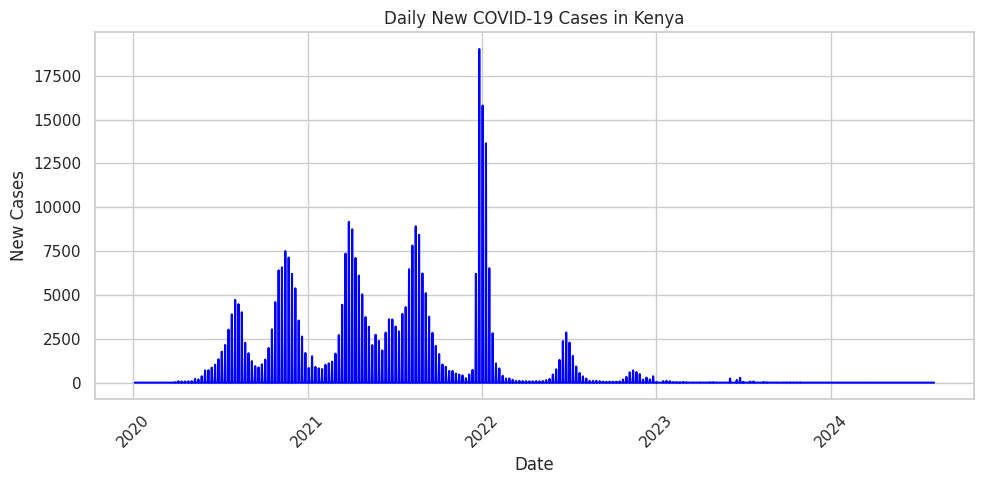

In [26]:
#visualising
plt.figure(figsize=(10,5))
plt.plot(kenya_df['date'], kenya_df['new_cases'], color='blue')
plt.title("Daily New COVID-19 Cases in Kenya")
plt.xlabel("Date")
plt.ylabel("New Cases")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/tmp/ipython-input-27-4052356050.py:8: UserWarning: Glyph 129521 (\N{BRICK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129521 (\N{BRICK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


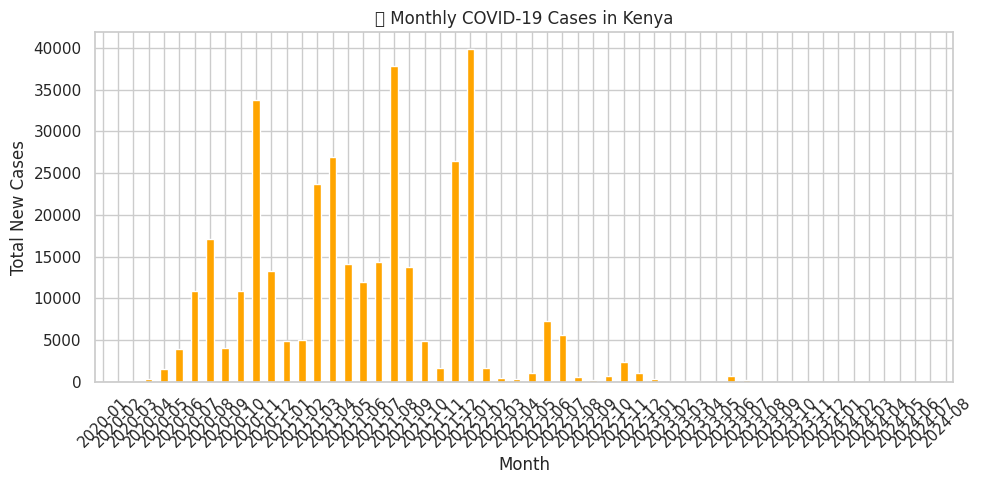

In [27]:
#visualising in bar chart
plt.figure(figsize=(10,5))
monthly_cases.plot(kind='bar', color='orange')
plt.title("🧱 Monthly COVID-19 Cases in Kenya")
plt.xlabel("Month")
plt.ylabel("Total New Cases")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

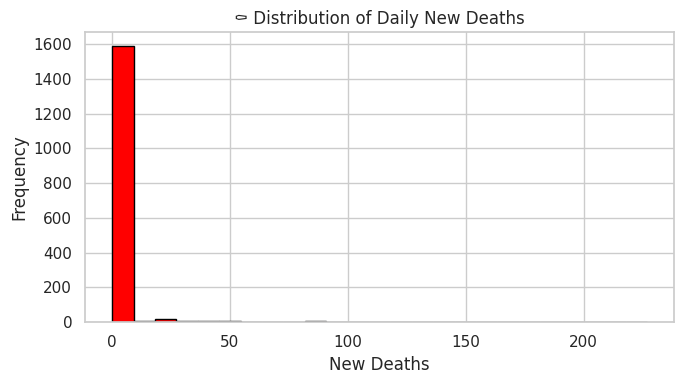

In [28]:
# histogram
plt.figure(figsize=(7,4))
plt.hist(kenya_df['new_deaths'], bins=25, color='red', edgecolor='black')
plt.title("⚰️ Distribution of Daily New Deaths")
plt.xlabel("New Deaths")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

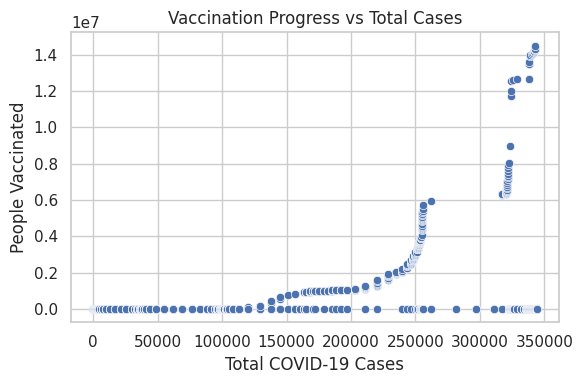

In [29]:
# scatter plots
plt.figure(figsize=(6,4))
sns.scatterplot(data=kenya_df, x='total_cases', y='people_vaccinated')
plt.title("Vaccination Progress vs Total Cases")
plt.xlabel("Total COVID-19 Cases")
plt.ylabel("People Vaccinated")
plt.tight_layout()
plt.show()

### Observations:
- Kenya experienced multiple waves of COVID-19 cases, with peaks during October, July and December.
- Daily deaths were mostly low but occasionally spiked during waves.
- Vaccination rollout accelerated as case numbers grew.
- Missing data was filled with 0s for simplicity, but in real-world analysis, better imputation or exclusion strategies should be used.